In [ ]:
# Importando a biblioteca para conectar ao Drive
from google.colab import drive

# Montando o drive (Isso vai pedir uma permissão de acesso, pode aceitar)
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importando as bibliotecas essenciais
import pandas as pd  # Para manipulação de tabelas (DataFrames)
import numpy as np   # Para cálculos matemáticos pesados

# Caminho do arquivo (ajuste o caminho conforme onde você salvou no Drive)
# Dica: No menu esquerdo do Colab (ícone de pasta), navegue até o arquivo,
# clique com botão direito e escolha "Copiar caminho".
caminho_arquivo = '/content/drive/MyDrive/Portifolio_Data/athlete_events.csv' # <-- ATUALIZE AQUI COM O NOME DO SEU ARQUIVO CSV

# Lendo o arquivo CSV e transformando em um DataFrame
df = pd.read_csv(caminho_arquivo)

# O comando .head() mostra as 5 primeiras linhas para vermos se funcionou
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# Mostra o resumo técnico da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
# Verificando quantos nulos temos antes da mudança
print("Nulos antes:", df['Medal'].isnull().sum())

# Preenchendo os vazios (NaN) da coluna Medal com o texto 'Sem Medalha'
# A função fillna() significa "fill na" -> "preencher nulos"
df['Medal'] = df['Medal'].fillna('Sem Medalha')

# Verificando se funcionou (o resultado deve ser 0 agora)
print("Nulos depois:", df['Medal'].isnull().sum())

Nulos antes: 231333
Nulos depois: 0


In [ ]:
# Criando um novo DataFrame APENAS com atletas que têm altura e peso registrados
# dropna() joga fora as linhas que têm nulos nas colunas especificadas (subset)
df_fisico = df.dropna(subset=['Height', 'Weight'])
# Optei por não imputar médias em altura/peso para preservar a integridade das diferenças biológicas entre modalidades.
# Vamos ver a diferença de tamanho
print(f"Total de registros originais: {df.shape[0]}")
print(f"Total de registros com dados físicos completos: {df_fisico.shape[0]}")

Total de registros originais: 271116
Total de registros com dados físicos completos: 206853


In [ ]:
# Criando um filtro (máscara booleana)
filtro_brasil = df['NOC'] == 'BRA' # NOC é a sigla do país (National Olympic Committee)

# Aplicando o filtro ao DataFrame
df_brasil = df[filtro_brasil]

# Vamos ver os 5 primeiros atletas brasileiros que aparecem
df_brasil.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,Sem Medalha
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,Sem Medalha
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Sem Medalha
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,Sem Medalha
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,Sem Medalha


In [ ]:
# Filtrando dentro do df_brasil onde a Medalha é 'Gold'
ouros_brasil = df_brasil[df_brasil['Medal'] == 'Gold']

# Contando as linhas (shape[0] dá o número de linhas)
print(f"Total de registros de Ouro do Brasil: {ouros_brasil.shape[0]}")

Total de registros de Ouro do Brasil: 109


In [ ]:
# O método .describe() calcula média, desvio padrão, min, max e quartis automaticamente
df_brasil[['Age', 'Height', 'Weight']].describe()

,Age,Height,Weight
count,3788.000000,3365.000000,3188.000000
mean,25.606125,177.637147,72.549875
std,6.025611,11.798370,14.823224
min,13.000000,133.000000,30.000000
25%,21.000000,170.000000,63.000000
50%,25.000000,178.000000,72.000000
75%,29.000000,185.000000,82.000000
max,56.000000,217.000000,160.000000


In [ ]:
# 1. Criamos um dicionário onde: 'Nome_Original': 'Nome_Novo'
# Dica: Não use acentos ou espaços nos nomes das colunas para facilitar o código depois.
# Ex: Use 'Equipe' ao invés de 'Équipe' ou 'Nome do Atleta' (use underscores: Nome_Atleta)

novos_nomes = {
    'ID': 'Id_Atleta',
    'Name': 'Nome',
    'Sex': 'Sexo',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'Team': 'Equipe',
    'NOC': 'Sigla_Pais',
    'Games': 'Jogos',
    'Year': 'Ano',
    'Season': 'Temporada',
    'City': 'Cidade_Sede',
    'Sport': 'Esporte',
    'Event': 'Evento',
    'Medal': 'Medalha'
}

# 2. Aplicamos a mudança ao DataFrame
# O parâmetro 'inplace=True' é OBRIGATÓRIO se você quiser salvar a alteração no mesmo df.
# Se não colocar inplace=True, ele só mostra como ficaria, mas não salva.
df.rename(columns=novos_nomes, inplace=True)

# 3. Vamos conferir se mudou
df.head()

,Id_Atleta,Nome,Sexo,Idade,Altura,Peso,Equipe,Sigla_Pais,Jogos,Ano,Temporada,Cidade_Sede,Esporte,Evento,Medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Sem Medalha
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Sem Medalha
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Sem Medalha
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Sem Medalha


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id_Atleta    271116 non-null  int64  
 1   Nome         271116 non-null  object 
 2   Sexo         271116 non-null  object 
 3   Idade        261642 non-null  float64
 4   Altura       210945 non-null  float64
 5   Peso         208241 non-null  float64
 6   Equipe       271116 non-null  object 
 7   Sigla_Pais   271116 non-null  object 
 8   Jogos        271116 non-null  object 
 9   Ano          271116 non-null  int64  
 10  Temporada    271116 non-null  object 
 11  Cidade_Sede  271116 non-null  object 
 12  Esporte      271116 non-null  object 
 13  Evento       271116 non-null  object 
 14  Medalha      271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
# Dicionário de tradução
novos_nomes = {
    'ID': 'Id_Atleta',
    'Name': 'Nome',
    'Sex': 'Sexo',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'Team': 'Equipe',
    'NOC': 'Sigla_Pais',
    'Games': 'Jogos',
    'Year': 'Ano',
    'Season': 'Temporada',
    'City': 'Cidade_Sede',
    'Sport': 'Esporte',
    'Event': 'Evento',
    'Medal': 'Medalha'
}

# FORMA INFALÍVEL: Atribuir o resultado de volta à variável df
df = df.rename(columns=novos_nomes)

# Verificando imediatamente
print(df.columns)

Index(['Id_Atleta', 'Nome', 'Sexo', 'Idade', 'Altura', 'Peso', 'Equipe',
       'Sigla_Pais', 'Jogos', 'Ano', 'Temporada', 'Cidade_Sede', 'Esporte',
       'Evento', 'Medalha'],
      dtype='object')


In [ ]:
# 1. Renomeia o original (garantido)
df = df.rename(columns=novos_nomes)

# 2. Recria os filtros usando os NOVOS nomes das colunas (note que agora uso 'Sigla_Pais' e 'Altura')
df_brasil = df[df['Sigla_Pais'] == 'BRA']
df_fisico = df.dropna(subset=['Altura', 'Peso'])

# 3. Prova real
df.head()

,Id_Atleta,Nome,Sexo,Idade,Altura,Peso,Equipe,Sigla_Pais,Jogos,Ano,Temporada,Cidade_Sede,Esporte,Evento,Medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Sem Medalha
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Sem Medalha
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,Sem Medalha
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Sem Medalha


In [ ]:
import matplotlib.pyplot as plt  # O "Pintor"
import seaborn as sns            # O "Decorador"

# Configuração para os gráficos ficarem com estilo profissional
sns.set_style("whitegrid")  # Fundo branco com linhas de grade (ótimo para relatórios)
plt.rcParams['figure.figsize'] = (12, 6) # Define o tamanho padrão das imagens (12 largura x 6 altura)

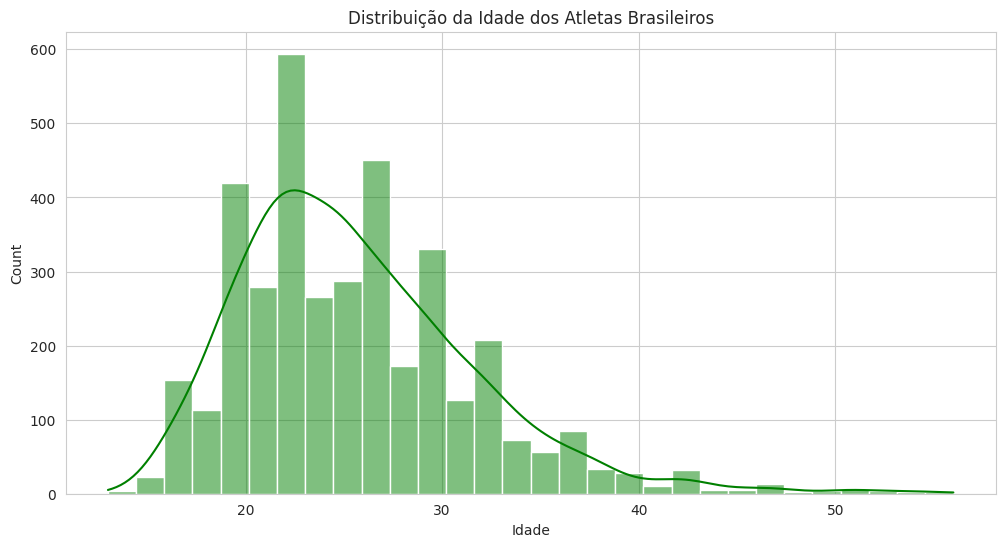

In [ ]:
# Título do gráfico
plt.title('Distribuição da Idade dos Atletas Brasileiros')

# Criando o histograma
# data=df_brasil -> Usando apenas dados do Brasil
# x='Idade' -> O eixo horizontal será a idade
# bins=30 -> Dividir em 30 "baldes" diferentes
# kde=True -> Adiciona aquela linha curva suave que mostra a tendência
sns.histplot(data=df_brasil, x='Idade', bins=30, kde=True, color='green')

# Mostra o gráfico
plt.show()

In [ ]:
# 1. Primeiro, vamos filtrar para pegar SÓ quem ganhou medalha (Tirar o "Sem Medalha")
# O símbolo != significa "Diferente de"
apenas_medalhistas = df_brasil[df_brasil['Medalha'] != 'Sem Medalha']

# 2. Agora o agrupamento (O Groupby)
# .groupby('Ano') -> Agrupe as linhas por ano
# ['Medalha'].count() -> Conte quantas medalhas tem em cada ano
medalhas_por_ano = apenas_medalhistas.groupby('Ano')['Medalha'].count()

# Vamos ver os números antes de plotar
print(medalhas_por_ano.tail(10)) # .tail(10) mostra os últimos 10 registros (anos mais recentes)

Ano
1980     9
1984    36
1988    23
1992    14
1996    63
2000    48
2004    40
2008    78
2012    59
2016    50
Name: Medalha, dtype: int64


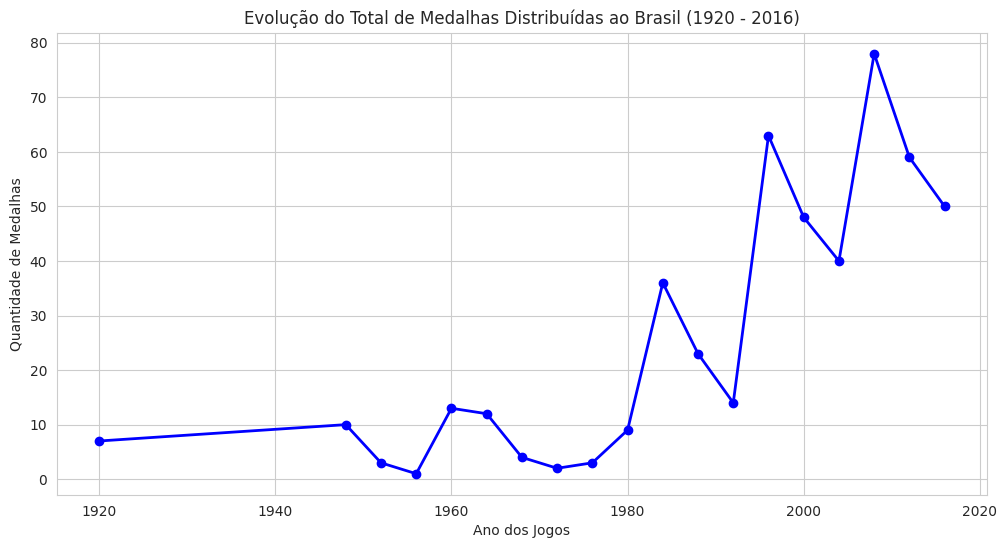

In [ ]:
# Criando o gráfico de linha
plt.figure(figsize=(12, 6)) # Garante o tamanho

# O comando de plotagem simples do Pandas/Matplotlib
# marker='o' coloca uma bolinha em cada ano para marcar o ponto
medalhas_por_ano.plot(kind='line', marker='o', color='blue', linewidth=2)

plt.title('Evolução do Total de Medalhas Distribuídas ao Brasil (1920 - 2016)')
plt.ylabel('Quantidade de Medalhas')
plt.xlabel('Ano dos Jogos')
plt.grid(True) # Garante as grades

plt.show()

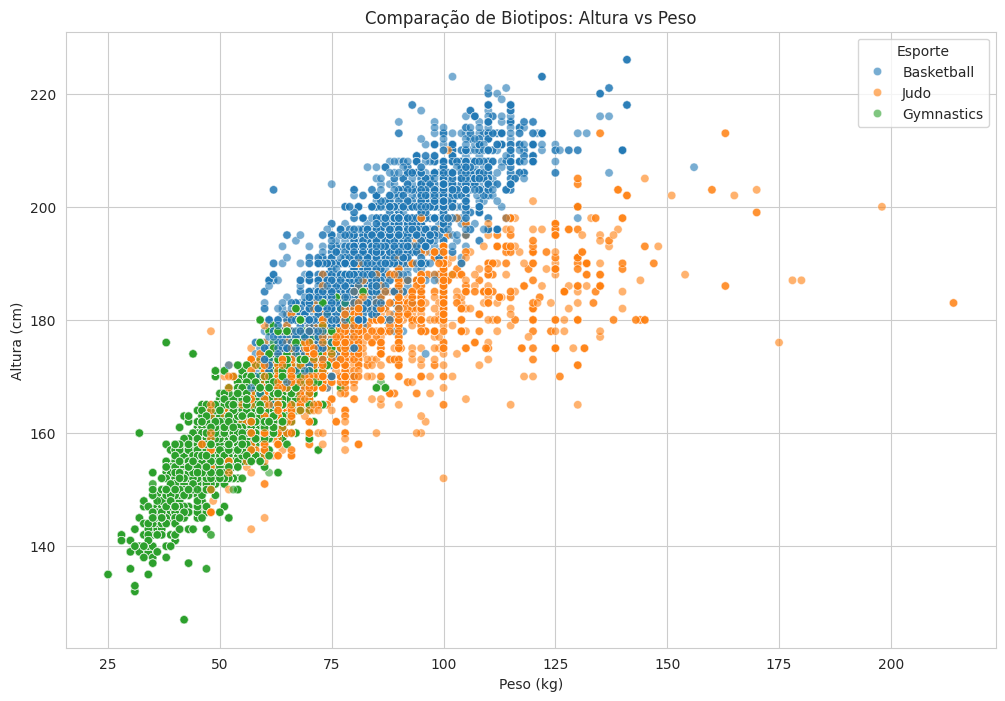

In [ ]:
# 1. Criando uma lista com os esportes que queremos comparar
esportes_alvo = ['Basketball', 'Gymnastics', 'Judo']

# 2. Filtrando o DF principal para pegar apenas esses 3
# O comando .isin() funciona como o "IN" do SQL -> "Onde esporte ESTÁ EM [lista]"
df_comparacao = df_fisico[df_fisico['Esporte'].isin(esportes_alvo)]

# 3. Criando o Gráfico de Dispersão
plt.figure(figsize=(12, 8))

# hue='Esporte' -> Isso é MÁGICO. Ele vai pintar as bolinhas com cores diferentes
# dependendo do esporte, automaticamente.
sns.scatterplot(data=df_comparacao, x='Peso', y='Altura', hue='Esporte', alpha=0.6)

plt.title('Comparação de Biotipos: Altura vs Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (cm)')
plt.show()

/tmp/ipython-input-2964628941.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_idade_ouro, x='Esporte', y='Idade', palette="Set2")


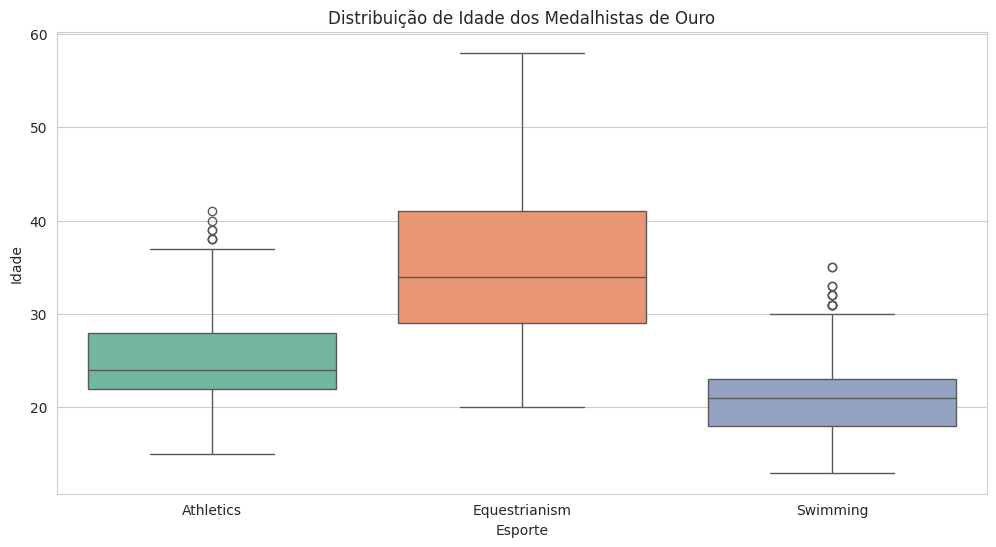

In [ ]:
# Vamos pegar 3 esportes diferentes: Natação, Atletismo e Hipismo (Equestrianism)
esportes_idade = ['Swimming', 'Athletics', 'Equestrianism']
df_idade = df[df['Esporte'].isin(esportes_idade)]

# Filtrando só quem ganhou Ouro
df_idade_ouro = df_idade[df_idade['Medalha'] == 'Gold']

plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=df_idade_ouro, x='Esporte', y='Idade', palette="Set2")

plt.title('Distribuição de Idade dos Medalhistas de Ouro')
plt.show()

In [ ]:
# 1. Definindo os esportes alvo (Biotipos distintos)
esportes_ml = ['Basketball', 'Gymnastics', 'Weightlifting', 'Athletics']

# 2. Filtrando o DataFrame "Físico" (aquele sem nulos que criamos na semana 1)
df_ml = df_fisico[df_fisico['Esporte'].isin(esportes_ml)].copy()

# 3. Selecionando apenas as colunas que importam
# Features (Características): Altura, Peso, Sexo
# Target (O que queremos prever): Esporte
df_ml = df_ml[['Altura', 'Peso', 'Sexo', 'Esporte']]

# Verificando
df_ml.head()

,Altura,Peso,Sexo,Esporte
0,180.0,80.0,M,Basketball
41,175.0,64.0,M,Gymnastics
42,175.0,64.0,M,Gymnastics
43,175.0,64.0,M,Gymnastics
44,175.0,64.0,M,Gymnastics


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Criando o "tradutor"
le = LabelEncoder()

# Aplicando na coluna Sexo
# O fit_transform aprende que M=1 e F=0 (ou vice-versa) e já troca
df_ml['Sexo_Num'] = le.fit_transform(df_ml['Sexo'])

# Vamos ver como ficou (compare a coluna Sexo com Sexo_Num)
df_ml.head()

,Altura,Peso,Sexo,Esporte,Sexo_Num
0,180.0,80.0,M,Basketball,1
41,175.0,64.0,M,Gymnastics,1
42,175.0,64.0,M,Gymnastics,1
43,175.0,64.0,M,Gymnastics,1
44,175.0,64.0,M,Gymnastics,1


In [ ]:
from sklearn.model_selection import train_test_split

# X = As perguntas (Altura, Peso, Sexo Numérico)
X = df_ml[['Altura', 'Peso', 'Sexo_Num']]

# y = A resposta (O Esporte)
y = df_ml['Esporte']

# Dividindo os dados (random_state=42 é para garantir que seu resultado seja igual ao meu)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Treinando com {len(X_train)} atletas e testando com {len(y_test)}.")

Treinando com 43177 atletas e testando com 14393.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 1. Criando o modelo (o cérebro vazio)
modelo = DecisionTreeClassifier(random_state=42)

# 2. Treinando (O 'fit' é o momento que ele estuda os dados de Treino)
modelo.fit(X_train, y_train)

# 3. Validando a acurácia (o quão bom ele ficou nos dados de Teste?)
acuracia = modelo.score(X_test, y_test)
print(f"Acurácia do modelo: {acuracia * 100:.2f}%")

Acurácia do modelo: 80.26%


In [ ]:
# Insira dados fictícios aqui para testar
# Exemplo: Altura 175cm, Peso 85kg, Sexo Masculino (assumindo que o encoder definiu M como 1 ou 0, vamos testar)

# Descobrindo qual número é Masculino no nosso encoder
sexo_codigo = le.transform(['M'])[0] # Transforma 'M' no número correspondente

# Dados do "Atleta Novo"
minha_altura = 182
meu_peso = 115
meu_sexo = sexo_codigo

# Criando a tabela com os dados (DataFrame de 1 linha)
novo_atleta = pd.DataFrame([[minha_altura, meu_peso, meu_sexo]],
                           columns=['Altura', 'Peso', 'Sexo_Num'])

# Pedindo para o modelo prever
previsao = modelo.predict(novo_atleta)

print(f"Com {minha_altura}cm e {meu_peso}kg, o modelo sugere que você seria atleta de: {previsao[0]}")

Com 182cm e 115kg, o modelo sugere que você seria atleta de: Athletics


In [ ]:
import json

# 1. Vamos pegar uma amostra de 300 atletas para o gráfico não ficar pesado
# (Se usarmos todos os 200.000, o navegador pode travar)
df_web = df_comparacao.sample(300, random_state=42)

# 2. Selecionar só o que interessa para o gráfico
df_web = df_web[['Nome', 'Esporte', 'Altura', 'Peso']]

# 3. Exportar para formato JSON (que o JavaScript entende)
dados_json = df_web.to_json(orient='records')

# Salvando em um arquivo que vamos usar já já
with open('dados_atletas.js', 'w') as f:
    f.write(f"const dadosAtletas = {dados_json};")

print("Arquivo 'dados_atletas.js' criado com sucesso! O Python entregou o bastão para o JavaScript.")

Arquivo 'dados_atletas.js' criado com sucesso! O Python entregou o bastão para o JavaScript.


In [ ]:
codigo_html = """
<!DOCTYPE html>
<html lang="pt-br">
<head>
    <meta charset="UTF-8">
    <title>Dashboard: Análise de Biotipos Olímpicos</title>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <style>
        body { font-family: sans-serif; background-color: #f4f4f9; text-align: center; padding: 20px; }
        .container { max-width: 900px; margin: 0 auto; background: white; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1); }
        h1 { color: #2c3e50; }
        p { color: #7f8c8d; }
    </style>
</head>
<body>

    <div class="container">
        <h1>🏅 O Corpo Define o Esporte?</h1>
        <p>Análise interativa de 300 atletas olímpicos (Amostra). Passe o mouse para ver detalhes.</p>

        <canvas id="meuGrafico"></canvas>
    </div>

    <script src="dados_atletas.js"></script>

    <script>
        // Lógica JavaScript para processar os dados

        // 1. Separar os dados por esporte para colorir diferente
        const esportes = [...new Set(dadosAtletas.map(item => item.Esporte))];
        const datasets = esportes.map(esporte => {
            return {
                label: esporte,
                data: dadosAtletas
                    .filter(item => item.Esporte === esporte)
                    .map(item => ({ x: item.Peso, y: item.Altura, nome: item.Nome })),
                backgroundColor: esporte === 'Basketball' ? 'rgba(255, 99, 132, 0.6)' :
                                 esporte === 'Judo' ? 'rgba(54, 162, 235, 0.6)' :
                                 'rgba(75, 192, 192, 0.6)',
                borderColor: 'rgba(0,0,0,0.1)',
                borderWidth: 1,
                pointRadius: 6,
                pointHoverRadius: 10
            };
        });

        // 2. Configurar o Gráfico
        const ctx = document.getElementById('meuGrafico').getContext('2d');
        new Chart(ctx, {
            type: 'scatter', // Gráfico de Dispersão
            data: { datasets: datasets },
            options: {
                responsive: true,
                plugins: {
                    tooltip: {
                        callbacks: {
                            label: function(context) {
                                let ponto = context.raw;
                                return ponto.nome + ': ' + ponto.y + 'cm, ' + ponto.x + 'kg';
                            }
                        }
                    }
                },
                scales: {
                    x: { title: { display: true, text: 'Peso (kg)' } },
                    y: { title: { display: true, text: 'Altura (cm)' } }
                }
            }
        });
    </script>
</body>
</html>
"""

# Salvando o arquivo HTML
with open('index.html', 'w') as f:
    f.write(codigo_html)

print("Site criado! Verifique os arquivos na pasta do Colab.")

Site criado! Verifique os arquivos na pasta do Colab.


In [ ]:
import json

# 1. Aumentando a amostra para 1000 atletas para o dashboard ficar mais "cheio"
# Se der erro por falta de dados, o python vai pegar o máximo que tiver
n_amostra = min(1000, len(df_comparacao))
df_web = df_comparacao.sample(n_amostra, random_state=42)

# 2. Selecionando colunas (Adicionamos 'Sexo' para poder filtrar no dashboard)
df_web = df_web[['Nome', 'Esporte', 'Altura', 'Peso', 'Sexo']]

# 3. Exportar para JSON
dados_json = df_web.to_json(orient='records')

with open('dados_atletas.js', 'w') as f:
    f.write(f"const dadosAtletas = {dados_json};")

print("Nova base de dados 'dados_atletas.js' atualizada com sucesso! (1000 atletas + Gênero)")

Nova base de dados 'dados_atletas.js' atualizada com sucesso! (1000 atletas + Gênero)


In [ ]:
codigo_html_avancado = """
<!DOCTYPE html>
<html lang="pt-br">
<head>
    <meta charset="UTF-8">
    <title>Dashboard Olímpico Pro</title>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <style>
        /* CSS: A Maquiagem do Site */
        body { font-family: 'Segoe UI', sans-serif; background-color: #f0f2f5; margin: 0; padding: 20px; }

        .header { text-align: center; margin-bottom: 30px; }
        .header h1 { color: #1a202c; margin: 0; }
        .header p { color: #718096; }

        /* KPI Cards (Os números no topo) */
        .kpi-container { display: flex; justify-content: space-around; gap: 20px; margin-bottom: 30px; flex-wrap: wrap; }
        .card { background: white; padding: 20px; border-radius: 12px; box-shadow: 0 2px 5px rgba(0,0,0,0.05); flex: 1; text-align: center; min-width: 200px; }
        .card h3 { margin: 0; color: #718096; font-size: 0.9em; text-transform: uppercase; }
        .card p { margin: 10px 0 0; font-size: 2em; font-weight: bold; color: #2d3748; }

        /* Área de Filtros */
        .controls { background: white; padding: 15px; border-radius: 12px; margin-bottom: 20px; display: flex; align-items: center; gap: 15px; box-shadow: 0 2px 5px rgba(0,0,0,0.05); }
        select { padding: 10px; border-radius: 6px; border: 1px solid #cbd5e0; font-size: 1em; }

        /* Gráficos Lado a Lado */
        .charts-grid { display: grid; grid-template-columns: 2fr 1fr; gap: 20px; }
        /* Se a tela for pequena, fica um embaixo do outro */
        @media (max-width: 900px) { .charts-grid { grid-template-columns: 1fr; } }

        .chart-box { background: white; padding: 20px; border-radius: 12px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); height: 400px; }
    </style>
</head>
<body>

    <div class="header">
        <h1>🏅 Analytics: Biotipo & Performance</h1>
        <p>Análise interativa de correlação entre físico e modalidade esportiva</p>
    </div>

    <div class="kpi-container">
        <div class="card">
            <h3>Total de Atletas</h3>
            <p id="kpi-total">0</p>
        </div>
        <div class="card">
            <h3>Média de Altura</h3>
            <p id="kpi-altura">0 cm</p>
        </div>
        <div class="card">
            <h3>Média de Peso</h3>
            <p id="kpi-peso">0 kg</p>
        </div>
    </div>

    <div class="controls">
        <label><strong>Filtrar por Esporte:</strong></label>
        <select id="filtroEsporte" onchange="atualizarDashboard()">
            <option value="Todos">Todos os Esportes</option>
            </select>
    </div>

    <div class="charts-grid">
        <div class="chart-box">
            <canvas id="scatterChart"></canvas>
        </div>
        <div class="chart-box">
            <canvas id="barChart"></canvas>
        </div>
    </div>

    <script src="dados_atletas.js"></script>

    <script>
        // --- JAVASCRIPT: O CÉREBRO DO DASHBOARD ---

        let chartDispersao = null;
        let chartBarras = null;

        // 1. Inicialização
        document.addEventListener('DOMContentLoaded', () => {
            preencherFiltro();
            renderizarGraficos(dadosAtletas);
            atualizarKPIs(dadosAtletas);
        });

        // 2. Preencher o Select com os esportes disponíveis
        function preencherFiltro() {
            const esportesUnicos = [...new Set(dadosAtletas.map(d => d.Esporte))];
            const select = document.getElementById('filtroEsporte');
            esportesUnicos.forEach(esporte => {
                const option = document.createElement('option');
                option.value = esporte;
                option.innerText = esporte;
                select.appendChild(option);
            });
        }

        // 3. Função que roda quando mudamos o filtro
        function atualizarDashboard() {
            const filtro = document.getElementById('filtroEsporte').value;

            // Filtra os dados
            let dadosFiltrados;
            if (filtro === 'Todos') {
                dadosFiltrados = dadosAtletas;
            } else {
                dadosFiltrados = dadosAtletas.filter(d => d.Esporte === filtro);
            }

            // Atualiza tudo
            atualizarKPIs(dadosFiltrados);
            renderizarGraficos(dadosFiltrados);
        }

        // 4. Calcular KPIs Matemáticos
        function atualizarKPIs(dados) {
            document.getElementById('kpi-total').innerText = dados.length;

            const mediaAltura = dados.reduce((acc, curr) => acc + curr.Altura, 0) / dados.length;
            document.getElementById('kpi-altura').innerText = mediaAltura.toFixed(1) + ' cm';

            const mediaPeso = dados.reduce((acc, curr) => acc + curr.Peso, 0) / dados.length;
            document.getElementById('kpi-peso').innerText = mediaPeso.toFixed(1) + ' kg';
        }

        // 5. Desenhar os Gráficos
        function renderizarGraficos(dados) {
            // Se já existirem gráficos, destrua antes de criar novos (para não sobrepor)
            if (chartDispersao) chartDispersao.destroy();
            if (chartBarras) chartBarras.destroy();

            // Preparando cores
            const cores = {
                'Basketball': 'rgba(255, 99, 132, 0.7)',
                'Judo': 'rgba(54, 162, 235, 0.7)',
                'Gymnastics': 'rgba(75, 192, 192, 0.7)',
                'Weightlifting': 'rgba(153, 102, 255, 0.7)',
                'Athletics': 'rgba(255, 206, 86, 0.7)'
            };

            // GRÁFICO 1: Scatterplot (Dispersão)
            const ctx1 = document.getElementById('scatterChart').getContext('2d');

            // Agrupando dados para o ChartJS
            const esportesNoFiltro = [...new Set(dados.map(d => d.Esporte))];
            const datasetsScatter = esportesNoFiltro.map(esporte => ({
                label: esporte,
                data: dados.filter(d => d.Esporte === esporte).map(d => ({ x: d.Peso, y: d.Altura })),
                backgroundColor: cores[esporte] || 'grey',
                pointRadius: 5
            }));

            chartDispersao = new Chart(ctx1, {
                type: 'scatter',
                data: { datasets: datasetsScatter },
                options: {
                    responsive: true,
                    maintainAspectRatio: false,
                    plugins: { title: { display: true, text: 'Distribuição de Peso x Altura' } },
                    scales: {
                        x: { title: { display: true, text: 'Peso (kg)' } },
                        y: { title: { display: true, text: 'Altura (cm)' } }
                    }
                }
            });

            // GRÁFICO 2: Barras (Contagem de Gênero)
            // Vamos contar quantos Homens (M) e Mulheres (F) tem nos dados filtrados
            const countM = dados.filter(d => d.Sexo === 'M').length;
            const countF = dados.filter(d => d.Sexo === 'F').length;

            const ctx2 = document.getElementById('barChart').getContext('2d');
            chartBarras = new Chart(ctx2, {
                type: 'doughnut', // Gráfico de Rosca
                data: {
                    labels: ['Masculino', 'Feminino'],
                    datasets: [{
                        data: [countM, countF],
                        backgroundColor: ['#36A2EB', '#FF6384']
                    }]
                },
                options: {
                    responsive: true,
                    maintainAspectRatio: false,
                    plugins: { title: { display: true, text: 'Proporção por Gênero' } }
                }
            });
        }
    </script>
</body>
</html>
"""

with open('index.html', 'w') as f:
    f.write(codigo_html_avancado)

print("Dashboard PRO criado! Baixe novamente o index.html e o dados_atletas.js")

Dashboard PRO criado! Baixe novamente o index.html e o dados_atletas.js


In [ ]:
import json

# 1. Pegando uma amostra (se o seu PC for potente, pode aumentar para 2000)
n_amostra = min(2000, len(df_comparacao))
df_web = df_comparacao.sample(n_amostra, random_state=42)

# 2. Selecionando colunas extras (Ano e Medalha)
df_web = df_web[['Nome', 'Esporte', 'Altura', 'Peso', 'Sexo', 'Ano', 'Medalha']]

# 3. Exportar para JSON
dados_json = df_web.to_json(orient='records')

with open('dados_atletas.js', 'w') as f:
    f.write(f"const dadosAtletas = {dados_json};")

print("Base atualizada com Sucesso! Agora temos Anos e Medalhas.")

Base atualizada com Sucesso! Agora temos Anos e Medalhas.


In [ ]:
codigo_html_dark = """
<!DOCTYPE html>
<html lang="pt-br">
<head>
    <meta charset="UTF-8">
    <title>Olympics Dark Analytics</title>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <style>
        /* --- ESTILO DARK MODE --- */
        :root {
            --bg-color: #121212;
            --card-bg: #1e1e1e;
            --text-main: #e0e0e0;
            --text-muted: #a0a0a0;
            --accent-color: #bb86fc;
            --border-color: #333;
        }

        body {
            font-family: 'Inter', 'Segoe UI', sans-serif;
            background-color: var(--bg-color);
            color: var(--text-main);
            margin: 0;
            padding: 20px;
        }

        .header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 30px;
            border-bottom: 1px solid var(--border-color);
            padding-bottom: 20px;
        }
        .header h1 { margin: 0; font-size: 1.5rem; letter-spacing: 1px; }
        .header span { color: var(--accent-color); font-weight: bold; }

        /* KPI Cards com efeito Neon suave */
        .kpi-container {
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
            gap: 20px;
            margin-bottom: 30px;
        }
        .card {
            background: var(--card-bg);
            padding: 20px;
            border-radius: 8px;
            border: 1px solid var(--border-color);
            text-align: left;
            transition: transform 0.2s;
        }
        .card:hover { transform: translateY(-5px); border-color: var(--accent-color); }
        .card h3 { margin: 0; color: var(--text-muted); font-size: 0.8rem; text-transform: uppercase; letter-spacing: 1px; }
        .card p { margin: 10px 0 0; font-size: 1.8rem; font-weight: 600; color: #fff; }
        .card .small-indicator { font-size: 0.9rem; color: #03dac6; } /* Verde Neon */

        /* Controles */
        .controls {
            background: var(--card-bg);
            padding: 15px;
            border-radius: 8px;
            margin-bottom: 20px;
            display: flex;
            align-items: center;
            gap: 15px;
            border: 1px solid var(--border-color);
        }
        select {
            padding: 10px;
            border-radius: 4px;
            background: #2c2c2c;
            color: white;
            border: 1px solid var(--border-color);
            font-size: 1em;
            outline: none;
        }

        /* Grid de Gráficos */
        .charts-grid {
            display: grid;
            grid-template-columns: 2fr 1fr;
            grid-template-rows: 400px 300px;
            gap: 20px;
        }

        .chart-box {
            background: var(--card-bg);
            padding: 15px;
            border-radius: 8px;
            border: 1px solid var(--border-color);
            position: relative;
        }

        .full-width { grid-column: 1 / -1; height: 300px; }

        @media (max-width: 900px) {
            .charts-grid { grid-template-columns: 1fr; grid-template-rows: auto; }
            .full-width { grid-column: 1; }
        }
    </style>
</head>
<body>

    <div class="header">
        <h1>OLYMPICS <span>ANALYTICS</span></h1>
        <p style="color: var(--text-muted)">Portfolio Project</p>
    </div>

    <div class="kpi-container">
        <div class="card">
            <h3>Atletas Analisados</h3>
            <p id="kpi-total">0</p>
        </div>
        <div class="card">
            <h3>IMC Médio (BMI)</h3>
            <p id="kpi-imc">0.0</p>
            <span class="small-indicator">Índice Corporal</span>
        </div>
        <div class="card">
            <h3>Medalhistas</h3>
            <p id="kpi-medalhas">0%</p>
            <span class="small-indicator">Taxa de Conversão</span>
        </div>
        <div class="card">
            <h3>Altura Média</h3>
            <p id="kpi-altura">0 cm</p>
        </div>
    </div>

    <div class="controls">
        <label>FILTRAR VISÃO:</label>
        <select id="filtroEsporte" onchange="atualizarDashboard()">
            <option value="Todos">Todos os Esportes</option>
        </select>
    </div>

    <div class="charts-grid">
        <div class="chart-box">
            <canvas id="scatterChart"></canvas>
        </div>
        <div class="chart-box">
            <canvas id="barChart"></canvas>
        </div>
        <div class="chart-box full-width">
            <canvas id="lineChart"></canvas>
        </div>
    </div>

    <script src="dados_atletas.js"></script>

    <script>
        // --- JAVASCRIPT LOGIC ---

        // Configuração Global do ChartJS para Dark Mode
        Chart.defaults.color = '#a0a0a0';
        Chart.defaults.borderColor = '#333';

        let chartDispersao, chartBarras, chartLinha;

        document.addEventListener('DOMContentLoaded', () => {
            preencherFiltro();
            // Inicia com todos os dados
            atualizarDashboard();
        });

        function preencherFiltro() {
            const esportesUnicos = [...new Set(dadosAtletas.map(d => d.Esporte))].sort();
            const select = document.getElementById('filtroEsporte');
            esportesUnicos.forEach(esporte => {
                const option = document.createElement('option');
                option.value = esporte;
                option.innerText = esporte;
                select.appendChild(option);
            });
        }

        function atualizarDashboard() {
            const filtro = document.getElementById('filtroEsporte').value;

            let dados = (filtro === 'Todos') ? dadosAtletas : dadosAtletas.filter(d => d.Esporte === filtro);

            calcularKPIs(dados);
            renderizarGraficos(dados);
        }

        function calcularKPIs(dados) {
            // 1. Total
            document.getElementById('kpi-total').innerText = dados.length;

            // 2. IMC Médio (Peso / Altura em Metros ao quadrado)
            let somaIMC = 0;
            let validosIMC = 0;
            dados.forEach(d => {
                if(d.Altura > 0 && d.Peso > 0) {
                    let alturaM = d.Altura / 100;
                    somaIMC += (d.Peso / (alturaM * alturaM));
                    validosIMC++;
                }
            });
            let mediaIMC = validosIMC > 0 ? (somaIMC / validosIMC).toFixed(1) : 0;
            document.getElementById('kpi-imc').innerText = mediaIMC;

            // 3. Taxa de Medalhas (Conversão)
            const totalMedalhas = dados.filter(d => d.Medalha !== 'Sem Medalha').length;
            const taxa = ((totalMedalhas / dados.length) * 100).toFixed(1);
            document.getElementById('kpi-medalhas').innerText = taxa + '%';

            // 4. Altura Média
            const mediaAltura = dados.reduce((acc, curr) => acc + curr.Altura, 0) / dados.length;
            document.getElementById('kpi-altura').innerText = mediaAltura.toFixed(1) + ' cm';
        }

        function renderizarGraficos(dados) {
            if (chartDispersao) chartDispersao.destroy();
            if (chartBarras) chartBarras.destroy();
            if (chartLinha) chartLinha.destroy();

            // Paleta de Cores Neon
            const cores = {
                'Basketball': '#ff0055',    // Neon Pink
                'Judo': '#00d4ff',          // Neon Blue
                'Gymnastics': '#00ff9d',    // Neon Green
                'Weightlifting': '#ffcc00', // Neon Yellow
                'Athletics': '#bd00ff'      // Neon Purple
            };

            // --- 1. SCATTER PLOT ---
            const ctx1 = document.getElementById('scatterChart').getContext('2d');
            const esportesNoFiltro = [...new Set(dados.map(d => d.Esporte))];

            const datasetsScatter = esportesNoFiltro.map(esporte => ({
                label: esporte,
                data: dados.filter(d => d.Esporte === esporte).map(d => ({ x: d.Peso, y: d.Altura })),
                backgroundColor: cores[esporte] || '#ffffff',
                pointRadius: 4,
                pointHoverRadius: 8
            }));

            chartDispersao = new Chart(ctx1, {
                type: 'scatter',
                data: { datasets: datasetsScatter },
                options: {
                    responsive: true,
                    maintainAspectRatio: false,
                    plugins: { title: { display: true, text: 'Distribuição Física (Peso x Altura)', color: '#fff' } },
                    scales: {
                        x: { title: { display: true, text: 'Peso (kg)' }, grid: { color: '#333' } },
                        y: { title: { display: true, text: 'Altura (cm)' }, grid: { color: '#333' } }
                    }
                }
            });

            // --- 2. DOUGHNUT (Gênero) ---
            const countM = dados.filter(d => d.Sexo === 'M').length;
            const countF = dados.filter(d => d.Sexo === 'F').length;

            const ctx2 = document.getElementById('barChart').getContext('2d');
            chartBarras = new Chart(ctx2, {
                type: 'doughnut',
                data: {
                    labels: ['Masc', 'Fem'],
                    datasets: [{
                        data: [countM, countF],
                        backgroundColor: ['#00d4ff', '#ff0055'],
                        borderWidth: 0
                    }]
                },
                options: {
                    responsive: true,
                    maintainAspectRatio: false,
                    plugins: {
                        legend: { position: 'bottom' },
                        title: { display: true, text: 'Gênero', color: '#fff' }
                    }
                }
            });

            // --- 3. LINE CHART (Timeline por Ano) ---
            // Agrupar dados por ano
            const anos = {};
            dados.forEach(d => {
                if(d.Ano) {
                    anos[d.Ano] = (anos[d.Ano] || 0) + 1;
                }
            });
            const labelsAno = Object.keys(anos).sort();
            const valuesAno = labelsAno.map(ano => anos[ano]);

            const ctx3 = document.getElementById('lineChart').getContext('2d');
            chartLinha = new Chart(ctx3, {
                type: 'line',
                data: {
                    labels: labelsAno,
                    datasets: [{
                        label: 'Atletas Participantes',
                        data: valuesAno,
                        borderColor: '#bb86fc',
                        backgroundColor: 'rgba(187, 134, 252, 0.1)',
                        fill: true,
                        tension: 0.4 // Deixa a linha curva
                    }]
                },
                options: {
                    responsive: true,
                    maintainAspectRatio: false,
                    plugins: { title: { display: true, text: 'Evolução da Participação (Timeline)', color: '#fff' } },
                    scales: {
                        x: { grid: { display: false } },
                        y: { grid: { color: '#333' } }
                    }
                }
            });
        }
    </script>
</body>
</html>
"""

with open('index.html', 'w') as f:
    f.write(codigo_html_dark)

print("Dashboard Dark Mode com Novos Insights criado! Baixe os arquivos.")

Dashboard Dark Mode com Novos Insights criado! Baixe os arquivos.


In [122]:
codigo_html_final = """
<!DOCTYPE html>
<html lang="pt-br">
<head>
    <meta charset="UTF-8">
    <title>Dashboard: Análise Olímpica</title>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <style>
        /* --- ESTILO DARK MODE (Visual Escuro) --- */
        :root {
            --bg-color: #121212;      /* Cor de fundo da página */
            --card-bg: #1e1e1e;       /* Cor de fundo dos cartões */
            --text-main: #e0e0e0;     /* Cor do texto principal */
            --text-muted: #a0a0a0;    /* Cor do texto secundário */
            --accent-color: #bb86fc;  /* Cor de destaque (Roxo Neon) */
            --border-color: #333;     /* Cor das bordas */
        }

        body {
            font-family: 'Inter', 'Segoe UI', sans-serif;
            background-color: var(--bg-color);
            color: var(--text-main);
            margin: 0;
            padding: 20px;
        }

        .header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 30px;
            border-bottom: 1px solid var(--border-color);
            padding-bottom: 20px;
        }
        .header h1 { margin: 0; font-size: 1.5rem; letter-spacing: 1px; }
        .header span { color: var(--accent-color); font-weight: bold; }

        /* KPI Cards (Os cartões com números) */
        .kpi-container {
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
            gap: 20px;
            margin-bottom: 30px;
        }
        .card {
            background: var(--card-bg);
            padding: 20px;
            border-radius: 8px;
            border: 1px solid var(--border-color);
            text-align: left;
            transition: transform 0.2s;
        }
        .card:hover { transform: translateY(-5px); border-color: var(--accent-color); }
        .card h3 { margin: 0; color: var(--text-muted); font-size: 0.8rem; text-transform: uppercase; letter-spacing: 1px; }
        .card p { margin: 10px 0 0; font-size: 1.8rem; font-weight: 600; color: #fff; }
        .card .small-indicator { font-size: 0.9rem; color: #03dac6; } /* Verde Neon para subtextos */

        /* Controles (Filtros) */
        .controls {
            background: var(--card-bg);
            padding: 15px;
            border-radius: 8px;
            margin-bottom: 20px;
            display: flex;
            align-items: center;
            gap: 15px;
            border: 1px solid var(--border-color);
        }
        select {
            padding: 10px;
            border-radius: 4px;
            background: #2c2c2c;
            color: white;
            border: 1px solid var(--border-color);
            font-size: 1em;
            outline: none;
        }

        /* Grid de Gráficos (Layout) */
        .charts-grid {
            display: grid;
            grid-template-columns: 2fr 1fr; /* 2 partes para o gráfico grande, 1 para o pequeno */
            grid-template-rows: 400px 300px;
            gap: 20px;
        }

        .chart-box {
            background: var(--card-bg);
            padding: 15px;
            border-radius: 8px;
            border: 1px solid var(--border-color);
            position: relative;
        }

        .full-width { grid-column: 1 / -1; height: 300px; } /* Ocupa a largura total */

        /* Ajuste para celular */
        @media (max-width: 900px) {
            .charts-grid { grid-template-columns: 1fr; grid-template-rows: auto; }
            .full-width { grid-column: 1; }
        }
    </style>
</head>
<body>

    <div class="header">
        <h1>ANÁLISE <span>OLÍMPICA</span></h1>
        <p style="color: var(--text-muted)">Projeto de Portfólio - Big Data</p>
    </div>

    <div class="kpi-container">
        <div class="card">
            <h3>Atletas Analisados</h3>
            <p id="kpi-total">0</p>
        </div>
        <div class="card">
            <h3>IMC Médio</h3>
            <p id="kpi-imc">0.0</p>
            <span class="small-indicator">Índice de Massa Corporal</span>
        </div>
        <div class="card">
            <h3>Medalhistas</h3>
            <p id="kpi-medalhas">0%</p>
            <span class="small-indicator">Taxa de Conversão</span>
        </div>
        <div class="card">
            <h3>Altura Média</h3>
            <p id="kpi-altura">0 cm</p>
        </div>
    </div>

    <div class="controls">
        <label>FILTRAR POR ESPORTE:</label>
        <select id="filtroEsporte" onchange="atualizarDashboard()">
            <option value="Todos">Todos os Esportes</option>
        </select>
    </div>

    <div class="charts-grid">
        <div class="chart-box">
            <canvas id="scatterChart"></canvas>
        </div>
        <div class="chart-box">
            <canvas id="barChart"></canvas>
        </div>
        <div class="chart-box full-width">
            <canvas id="lineChart"></canvas>
        </div>
    </div>

    <script src="dados_atletas.js"></script>

    <script>
        // --- LÓGICA JAVASCRIPT ---

        // Configuração Global das Cores para o Tema Escuro
        Chart.defaults.color = '#a0a0a0';
        Chart.defaults.borderColor = '#333';

        let chartDispersao, chartBarras, chartLinha;

        // Quando a página carregar, executa isso:
        document.addEventListener('DOMContentLoaded', () => {
            preencherFiltro();
            // Inicia o dashboard mostrando tudo
            atualizarDashboard();
        });

        // Preenche a lista de esportes no menu
        function preencherFiltro() {
            const esportesUnicos = [...new Set(dadosAtletas.map(d => d.Esporte))].sort();
            const select = document.getElementById('filtroEsporte');
            esportesUnicos.forEach(esporte => {
                const option = document.createElement('option');
                option.value = esporte;
                option.innerText = esporte; // Aqui o nome do esporte vem do Python (já deve estar ou em inglês ou português conforme a base)
                select.appendChild(option);
            });
        }

        // Atualiza os números e gráficos quando muda o filtro
        function atualizarDashboard() {
            const filtro = document.getElementById('filtroEsporte').value;

            // Lógica: Se for 'Todos', pega tudo. Se não, filtra pelo esporte escolhido.
            let dados = (filtro === 'Todos') ? dadosAtletas : dadosAtletas.filter(d => d.Esporte === filtro);

            calcularKPIs(dados);
            renderizarGraficos(dados);
        }

        // Calcula os números dos cartões (KPIs)
        function calcularKPIs(dados) {
            // 1. Total
            document.getElementById('kpi-total').innerText = dados.length;

            // 2. IMC Médio (Peso / Altura x Altura)
            let somaIMC = 0;
            let validosIMC = 0;
            dados.forEach(d => {
                if(d.Altura > 0 && d.Peso > 0) {
                    let alturaM = d.Altura / 100; // Converte cm para metros
                    somaIMC += (d.Peso / (alturaM * alturaM));
                    validosIMC++;
                }
            });
            let mediaIMC = validosIMC > 0 ? (somaIMC / validosIMC).toFixed(1) : 0;
            document.getElementById('kpi-imc').innerText = mediaIMC;

            // 3. Taxa de Medalhas
            const totalMedalhas = dados.filter(d => d.Medalha !== 'Sem Medalha').length;
            const taxa = ((totalMedalhas / dados.length) * 100).toFixed(1);
            document.getElementById('kpi-medalhas').innerText = taxa + '%';

            // 4. Altura Média
            const mediaAltura = dados.reduce((acc, curr) => acc + curr.Altura, 0) / dados.length;
            document.getElementById('kpi-altura').innerText = mediaAltura.toFixed(1) + ' cm';
        }

        // Desenha os gráficos na tela
        function renderizarGraficos(dados) {
            // Limpa os gráficos antigos se existirem
            if (chartDispersao) chartDispersao.destroy();
            if (chartBarras) chartBarras.destroy();
            if (chartLinha) chartLinha.destroy();

            // Paleta de Cores Neon para os Esportes
            const cores = {
                'Basketball': '#ff0055',    // Rosa Neon
                'Judo': '#00d4ff',          // Azul Neon
                'Gymnastics': '#00ff9d',    // Verde Neon
                'Weightlifting': '#ffcc00', // Amarelo Neon
                'Athletics': '#bd00ff'      // Roxo Neon
            };

            // --- 1. GRÁFICO DE DISPERSÃO (Scatter) ---
            const ctx1 = document.getElementById('scatterChart').getContext('2d');
            const esportesNoFiltro = [...new Set(dados.map(d => d.Esporte))];

            const datasetsScatter = esportesNoFiltro.map(esporte => ({
                label: esporte,
                data: dados.filter(d => d.Esporte === esporte).map(d => ({ x: d.Peso, y: d.Altura })),
                backgroundColor: cores[esporte] || '#ffffff',
                pointRadius: 4,
                pointHoverRadius: 8
            }));

            chartDispersao = new Chart(ctx1, {
                type: 'scatter',
                data: { datasets: datasetsScatter },
                options: {
                    responsive: true,
                    maintainAspectRatio: false,
                    plugins: {
                        title: { display: true, text: 'Distribuição Física (Peso x Altura)', color: '#fff', font: {size: 16} }
                    },
                    scales: {
                        x: { title: { display: true, text: 'Peso (kg)' }, grid: { color: '#333' } },
                        y: { title: { display: true, text: 'Altura (cm)' }, grid: { color: '#333' } }
                    }
                }
            });

            // --- 2. GRÁFICO DE ROSCA (Gênero) ---
            const countM = dados.filter(d => d.Sexo === 'M').length;
            const countF = dados.filter(d => d.Sexo === 'F').length;

            const ctx2 = document.getElementById('barChart').getContext('2d');
            chartBarras = new Chart(ctx2, {
                type: 'doughnut',
                data: {
                    labels: ['Masculino', 'Feminino'], // Traduzido
                    datasets: [{
                        data: [countM, countF],
                        backgroundColor: ['#00d4ff', '#ff0055'],
                        borderWidth: 0
                    }]
                },
                options: {
                    responsive: true,
                    maintainAspectRatio: false,
                    plugins: {
                        legend: { position: 'bottom' },
                        title: { display: true, text: 'Proporção por Gênero', color: '#fff', font: {size: 14} }
                    }
                }
            });

            // --- 3. GRÁFICO DE LINHA (Timeline) ---
            // Agrupar dados por ano
            const anos = {};
            dados.forEach(d => {
                if(d.Ano) {
                    anos[d.Ano] = (anos[d.Ano] || 0) + 1;
                }
            });
            const labelsAno = Object.keys(anos).sort();
            const valuesAno = labelsAno.map(ano => anos[ano]);

            const ctx3 = document.getElementById('lineChart').getContext('2d');
            chartLinha = new Chart(ctx3, {
                type: 'line',
                data: {
                    labels: labelsAno,
                    datasets: [{
                        label: 'Atletas Participantes', // Traduzido
                        data: valuesAno,
                        borderColor: '#bb86fc',
                        backgroundColor: 'rgba(187, 134, 252, 0.1)',
                        fill: true,
                        tension: 0.4
                    }]
                },
                options: {
                    responsive: true,
                    maintainAspectRatio: false,
                    plugins: { title: { display: true, text: 'Evolução da Participação (Linha do Tempo)', color: '#fff', font: {size: 16} } },
                    scales: {
                        x: { grid: { display: false } },
                        y: { grid: { color: '#333' } }
                    }
                }
            });
        }
    </script>
</body>
</html>
"""

with open('index.html', 'w') as f:
    f.write(codigo_html_final)

print("Dashboard Dark Mode com Novos Insights criado! Baixe os arquivos.")

Dashboard Dark Mode com Novos Insights criado! Baixe os arquivos.
